<a href="https://www.kaggle.com/code/sujithasurendran/titanic-mlproject?scriptVersionId=92474040" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [41]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train.isnull().sum()
train.drop(['Cabin','Name'], axis=1, inplace =True)

In [45]:
train.drop(['Ticket'], axis=1,inplace = True)

In [46]:
mean_age = train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_age)

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
test.drop(['Cabin'], axis=1, inplace =True)

In [49]:
test.drop(['Name'], axis =1, inplace = True)

In [50]:
test.drop(['Ticket'], axis=1, inplace = True)

In [51]:
mean_age = test['Age'].mean()

test["Age"] = test["Age"].fillna(mean_age)


In [52]:
train = pd.get_dummies(train, columns = ['Embarked'])


In [53]:
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.000000,1,0,7.2500,0,0,1
1,2,1,1,female,38.000000,1,0,71.2833,1,0,0
2,3,1,3,female,26.000000,0,0,7.9250,0,0,1
3,4,1,1,female,35.000000,1,0,53.1000,0,0,1
4,5,0,3,male,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0,0,1
887,888,1,1,female,19.000000,0,0,30.0000,0,0,1
888,889,0,3,female,29.699118,1,2,23.4500,0,0,1
889,890,1,1,male,26.000000,0,0,30.0000,1,0,0


In [54]:
test = pd.get_dummies(test, columns = ['Embarked'])


In [55]:
train['Fare'] = train['Fare'].apply(np.floor).astype(int)
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.000000,1,0,7,0,0,1
1,2,1,1,female,38.000000,1,0,71,1,0,0
2,3,1,3,female,26.000000,0,0,7,0,0,1
3,4,1,1,female,35.000000,1,0,53,0,0,1
4,5,0,3,male,35.000000,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13,0,0,1
887,888,1,1,female,19.000000,0,0,30,0,0,1
888,889,0,3,female,29.699118,1,2,23,0,0,1
889,890,1,1,male,26.000000,0,0,30,1,0,0


In [56]:
train['Age'] = train['Age'].apply(np.floor).astype(int)
train



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22,1,0,7,0,0,1
1,2,1,1,female,38,1,0,71,1,0,0
2,3,1,3,female,26,0,0,7,0,0,1
3,4,1,1,female,35,1,0,53,0,0,1
4,5,0,3,male,35,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13,0,0,1
887,888,1,1,female,19,0,0,30,0,0,1
888,889,0,3,female,29,1,2,23,0,0,1
889,890,1,1,male,26,0,0,30,1,0,0


In [57]:
test['Fare'] = test['Fare'].fillna(0)
test['Fare'] = test['Fare'].astype(int)

In [58]:
test['Age'] = test['Age'].apply(np.floor).astype(int)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34,0,0,7,0,1,0
1,893,3,female,47,1,0,7,0,0,1
2,894,2,male,62,0,0,9,0,1,0
3,895,3,male,27,0,0,8,0,0,1
4,896,3,female,22,1,1,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,8,0,0,1
414,1306,1,female,39,0,0,108,1,0,0
415,1307,3,male,38,0,0,7,0,0,1
416,1308,3,male,30,0,0,8,0,0,1


<AxesSubplot:xlabel='Sex', ylabel='Age'>

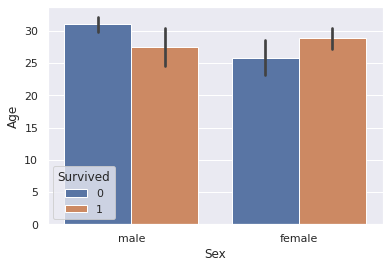

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Sex", y="Age", hue = "Survived", data=train)

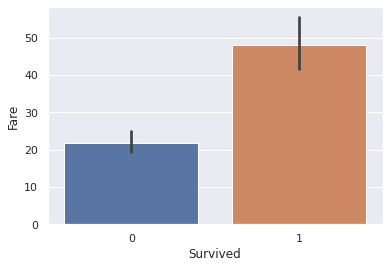

In [60]:
sns.set(style="darkgrid")

sns.barplot(data=train, x="Survived", y = "Fare")

plt.show()

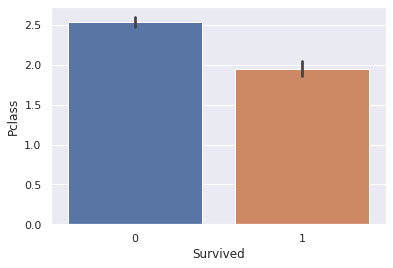

In [61]:
sns.set(style="darkgrid")

sns.barplot(data=train, x="Survived", y = "Pclass")
plt.show()

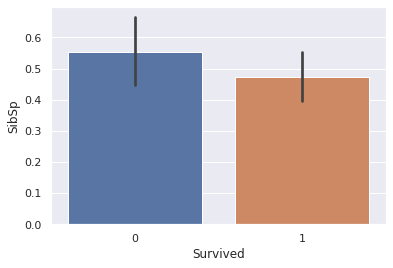

In [62]:
sns.set(style="darkgrid")

sns.barplot(data=train, x="Survived", y = "SibSp")
plt.show()

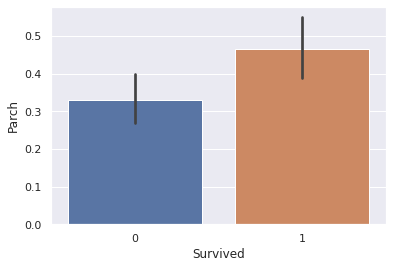

In [63]:
sns.set(style="darkgrid")

sns.barplot(data=train, x="Survived", y = "Parch")
plt.show()

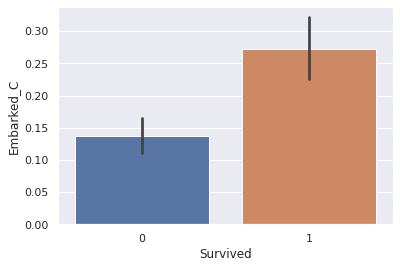

In [64]:
sns.set(style="darkgrid")

sns.barplot(data=train, x="Survived", y = "Embarked_C")
plt.show()

In [65]:
train = pd.get_dummies(train, columns = ['Sex'])
test = pd.get_dummies(test, columns = ['Sex'])

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

features = ["Pclass", "Sex_female","Sex_male","SibSp", "Parch","Embarked_C","Embarked_Q","Embarked_S"]
X_train = train[features]
y_train = train["Survived"]
X_test = test[features]

In [67]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [68]:

predictions = log_model.predict(X_test)
predictions.shape

(418,)

In [69]:
acc_log = round(log_model.score(X_train, y_train) * 100, 2)
acc_log

79.12

In [70]:



output = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": predictions})

output.to_csv('./output.csv', index = False)